# PRE-PARCIAL 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# RUNGE - KUTTA 4

# Get Euler 4

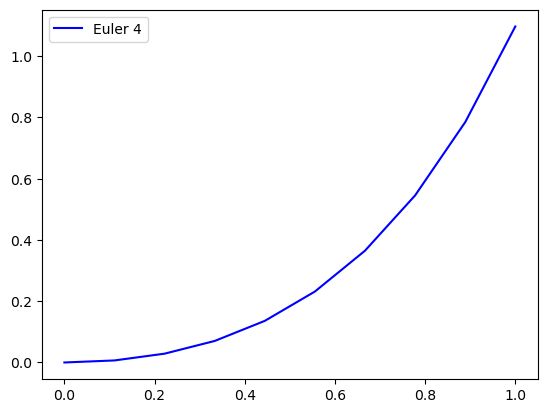

In [2]:
def GetEuler4(x, y, h):
    for i in range(1, len(x)):
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k2)
        k4 = f(x[i-1] + h, y[i-1] + h*k3)
        
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        
def f(x,y):
    return x + 2*y #Función que tocaría cambiar

N = 10
t = np.linspace(0,1,N)
h = t[1] - t[0]
y4 = np.zeros_like(t)
y4[0] = 0.

GetEuler4(t, y4, h)

plt.plot(t, y4, label='Euler 4', color = 'blue')
plt.legend()
plt.show()

# Complex Euler 4

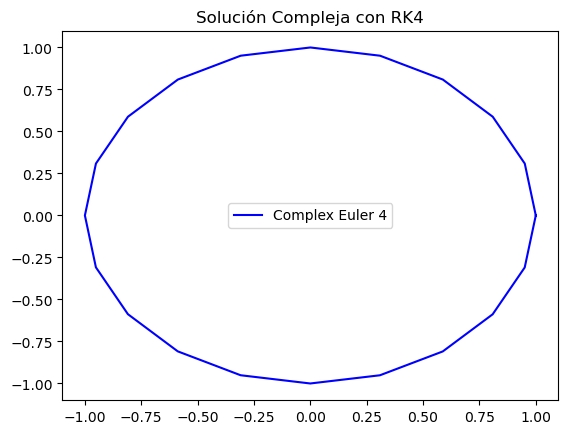

In [4]:
def fc(z):
    return 1j*z # Función que tocaría cambiar

def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f + h_*k1/2)
    k3 = fc(f + h_*k2/2)
    k4 = fc(f + h_*k3)
    
    f += (h_/6)*(k1 + 2*k2 + 2*k3 + k4)

theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion4 = np.array([theta, f]) 

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta, f])])

Re4 = np.real(Solucion4[:, 1])
Im4 = np.imag(Solucion4[:, 1])

plt.plot(Re4, Im4, label="Complex Euler 4", color = 'blue')
plt.title("Solución Compleja con RK4")
plt.legend()
plt.show()

# Sistema de Ecuaciones 4

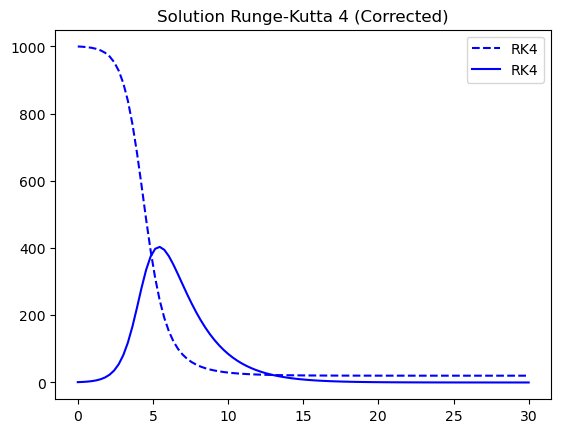

In [8]:
def System(r,t,beta,gamma):
    
    # Derivadas con respecto al tiempo
    dsdt = -beta*r[0]*r[1]
    didt =  beta*r[0]*r[1] - gamma*r[1]

    return [dsdt,didt]

t = np.linspace(0,30,100)
beta = 0.002
gamma = 0.5
r0 = [1000,1]

# Sistema de Ecuaciones que tocaría cambiar
def f0(S,I,beta,gamma):
    return -beta*S*I

def f1(S,I,beta,gamma):
    return beta*S*I - gamma*I

def GetEuler4System(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    K4 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        xn = S[i-1]
        yn = I[i-1]

        K1[0] = f0(xn, yn, beta, gamma)
        K1[1] = f1(xn, yn, beta, gamma)

        K2[0] = f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)
        K2[1] = f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K1[1], beta, gamma)

        K3[0] = f0(xn + 0.5 * h * K1[0], yn + 0.5 * h * K2[1], beta, gamma)
        K3[1] = f1(xn + 0.5 * h * K1[0], yn + 0.5 * h * K2[1], beta, gamma)

        K4[0] = f0(xn + h * K1[0], yn + h * K3[1], beta, gamma)
        K4[1] = f1(xn + h * K1[0], yn + h * K3[1], beta, gamma)

        S[i] = xn + (h / 6) * (K1[0] + 2 * K2[0] + 2 * K3[0] + K4[0])
        I[i] = yn + (h / 6) * (K1[1] + 2 * K2[1] + 2 * K3[1] + K4[1])
        
    return S,I

S4,I4 = GetEuler4System(f0,f1,r0,t)

plt.plot(t,S4,label='RK4', color = 'blue', linestyle = 'dashed')
plt.plot(t,I4,label='RK4', color = 'blue')
plt.title('Solution Runge-Kutta 4 (Corrected)')
plt.legend()